In [1]:
!pip install --upgrade --q --no-cache-dir gdown




!gdown 1G4jyWGcAxKTvEe26GWwObt5ifRqziMRI

Downloading...
From (uriginal): https://drive.google.com/uc?id=1G4jyWGcAxKTvEe26GWwObt5ifRqziMRI
From (redirected): https://drive.google.com/uc?id=1G4jyWGcAxKTvEe26GWwObt5ifRqziMRI&confirm=t&uuid=9a1717c7-b6ed-4e6e-9fd5-32374a1b7ca6
To: /content/mitbih_train.csv
100% 412M/412M [00:06<00:00, 62.2MB/s]


In [2]:
!pip install --upgrade --q --no-cache-dir gdown



!gdown 1IdTpHyx9pwmfnIezt8O7kMXz3BbEuTGh

Downloading...
From: https://drive.google.com/uc?id=1IdTpHyx9pwmfnIezt8O7kMXz3BbEuTGh
To: /content/mitbih_test.csv
100% 103M/103M [00:02<00:00, 48.0MB/s]


In [3]:
!pip install --upgrade --q --no-cache-dir gdown



!gdown 1cZu6s_b5Ah1OC06zewt87O83ZkaPwLBS

Downloading...
From: https://drive.google.com/uc?id=1cZu6s_b5Ah1OC06zewt87O83ZkaPwLBS
To: /content/ptbdb_abnormal.csv
100% 49.4M/49.4M [00:00<00:00, 56.6MB/s]


In [4]:
!pip install --upgrade --q --no-cache-dir gdown



!gdown 12KYqhrPKtLZam_aNPEdnXecssi_bagI3

Downloading...
From: https://drive.google.com/uc?id=12KYqhrPKtLZam_aNPEdnXecssi_bagI3
To: /content/ptbdb_normal.csv
100% 19.0M/19.0M [00:00<00:00, 51.2MB/s]


In [5]:
pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.4 MB/s eta 0:00:00


In [6]:
!pip install scikit-learn==0.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


#ECG Heartbeat Classification Datset
This notebook involves the making of machine learning models to classify the given data of obtained as an heartbeat ECG into differen classes. We'll undergo machine learning processes to classify them. AS given in the dataset, we are given 5 different classes of heartbeat as [N:0, S:1, V:2 , F:3, Q:4]

N: Non-Ectopic Beats
S: Superventrical Ectopic Beats
V: Ventricular Ectopic Beats
F: Fusion Beats
Q: Unknown Beats
The CNN Algotithm that we'll implement will classigy the given heartbeat into one of these classes

In [7]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, tqdm, re, time, itertools, sys
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras import optimizers, losses, activations, models
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint,EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [8]:
# loading all data files into memory
start = time.time()

data_train = pd.read_csv('/content/mitbih_train.csv', header=None)
data_test = pd.read_csv('/content/mitbih_test.csv', header=None)
abnormal = pd.read_csv('/content/ptbdb_abnormal.csv', header=None)
normal = pd.read_csv('/content/ptbdb_normal.csv', header=None)

end = time.time()
print('Time taken: %.3f seconds' % (end-start))

print('Data loaded........ Sucessfully')

Time taken: 11.323 seconds
Data loaded........ Sucessfully


In [9]:
data_train[187].unique()

array([0., 1., 2., 3., 4.])

In [10]:
normal = normal.drop([187], axis=1)
abnormal = abnormal.drop([187], axis=1)

#EDA (EXPLORATORY DATA ANALYSIS) ||
In this step, we will undergo an EDA (Exploratory Data Analysis) to get brief understanding of our data. We are given a data concerned with the ECG of a patient, classified into normal and abnormal classes. We'll make some plots to see the variations in the heart rate of a patient with normal and abnormal ECG.

In [11]:
data_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [12]:
abnormal.shape, normal.shape

((10506, 187), (4046, 187))

We have a total of 10506 rows and 188 columns for abormal & 4045 rows and 188 columns of a normal ECG in our data

In [13]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As it can be seen, the data is composed of columns (features) that contain the floating point numbers that represent the heart rate.

In [14]:
data_train.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
           dtype='int64', length=188)

In [15]:
abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
normal.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
flatten_y = abnormal.values
flatten_y = flatten_y[:, 5:70].flatten()
flatten_y

array([0.93397045, 0.80104256, 0.7497828 , ..., 0.06976745, 0.06078224,
       0.06606765])

Data Visualization
For better comprehension, we'll plot the data of normal and abnormal ECG rate to see how the curves look like. Given below are some plots of normal and abnormal ECG rate.

#ABNORMAL HEARTBEAT VISULAIZATION ||Abormal ECG Visualization
Below are some plots showing the ECG Curve of those persons who have an abnormal ECG rate

<ipython-input-18-2d0a1ab34c1d>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


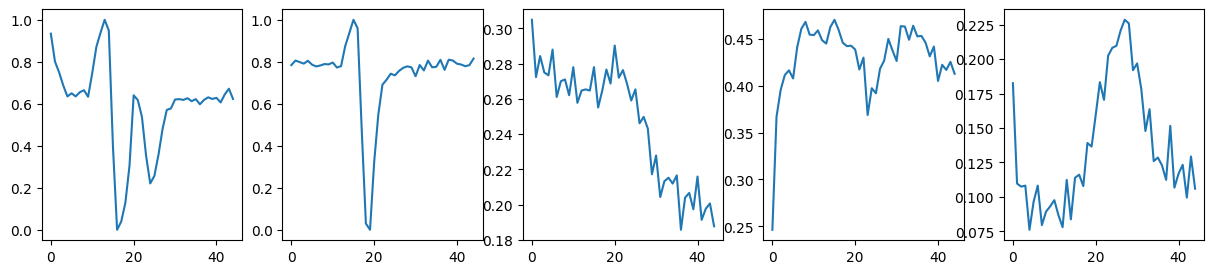

In [18]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Abormal Persons')
plt.subplot(1, 5, 1)
plt.plot(abnormal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(abnormal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(abnormal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(abnormal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(abnormal.values[44][5:50])

#NORMAL HEARTBEAT VISUALIZATION

<ipython-input-19-8380bbba74cc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


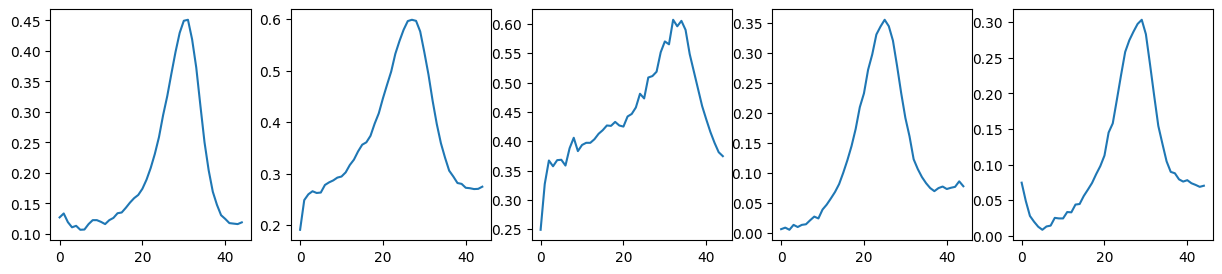

In [19]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Normal Persons')
plt.subplot(1, 5, 1)
plt.plot(normal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(normal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(normal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(normal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(normal.values[77][5:50])

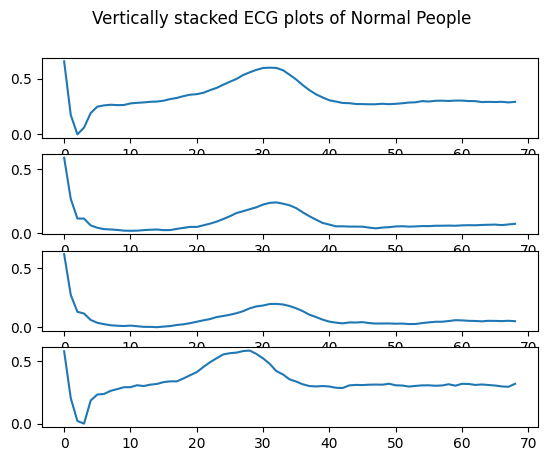

In [20]:
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked ECG plots of Normal People')
axs[0].plot(normal.values[10][1:70])
axs[1].plot(normal.values[55][1:70])
axs[2].plot(normal.values[87][1:70])
axs[3].plot(normal.values[98][1:70])


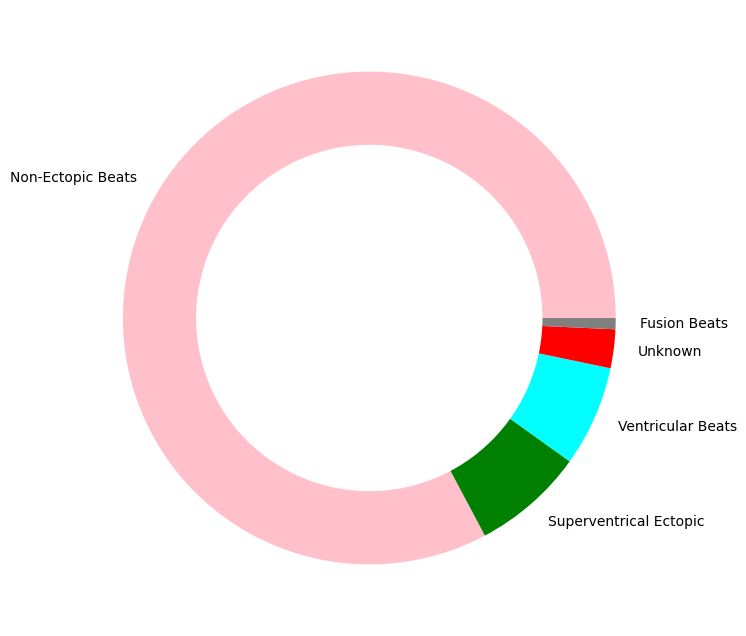

In [21]:
# viewing the distribution of beats in our dataset
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data_train[187].value_counts(), labels=['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats',
                                                'Unknown', 'Fusion Beats'], colors=['pink', 'green', 'cyan',
                                                                                   'red', 'grey'])
p = plt.gcf()
p.gca().add_artist(circle)

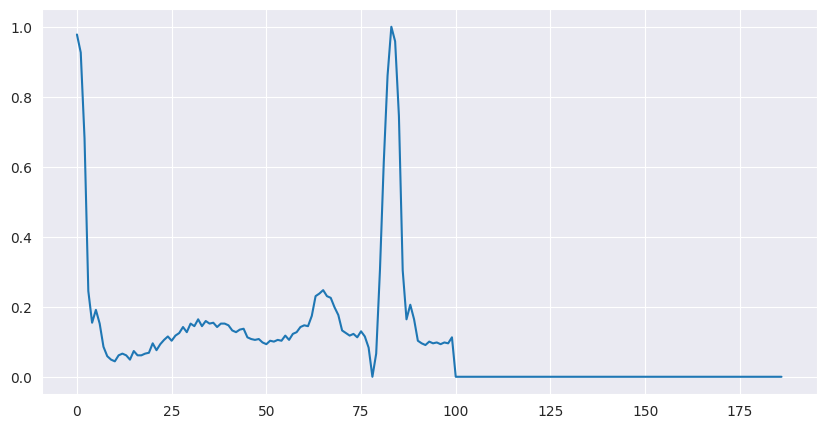

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187])

#CONCLUSION:
We can conclude from above figures that the persons having normal ECG rate, the figures are following a bell-curve pattern. The ECG of abnormal persons show othe types of curves. We'll use this information to make our machine learning model for classification.



#DATA PRE-PROCESSING ||

At this stage, we'll undergo some data preprocessing process to see if the data needs to be cleaned. Cleaned data is requried for model fitting in next phases.

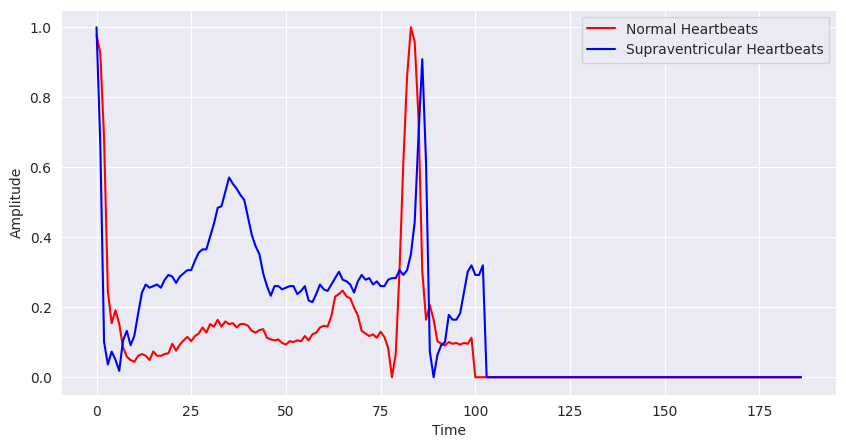

In [23]:
# making the class labels for our dataset
data_0 = data_train[data_train[187] == 0]
data_1 = data_train[data_train[187] == 1]
data_2 = data_train[data_train[187] == 2]
data_3 = data_train[data_train[187] == 3]
data_4 = data_train[data_train[187] == 4]

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='red', label='Normal Heartbeats')
plt.plot(data_1.iloc[0, 0:187], color='blue', label='Supraventricular Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

In [24]:
data_1

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
72471,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
72472,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,...,0.461957,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783,1.0
72473,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
72474,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,...,0.122172,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000,1.0
72475,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74689,1.000000,0.917073,0.253659,0.000000,0.092683,0.185366,0.165854,0.239024,0.278049,0.185366,...,0.375610,0.380488,0.356098,0.346341,0.370732,0.40000,0.375610,0.380488,0.400000,1.0
74690,0.014837,0.130564,0.213650,0.311573,0.430267,0.548961,0.664688,0.700297,0.721068,0.718101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
74691,1.000000,0.895735,0.199052,0.000000,0.052133,0.052133,0.042654,0.104265,0.203791,0.194313,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
74692,0.904059,0.808118,0.195572,0.000000,0.081181,0.114391,0.147601,0.225092,0.177122,0.136531,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0


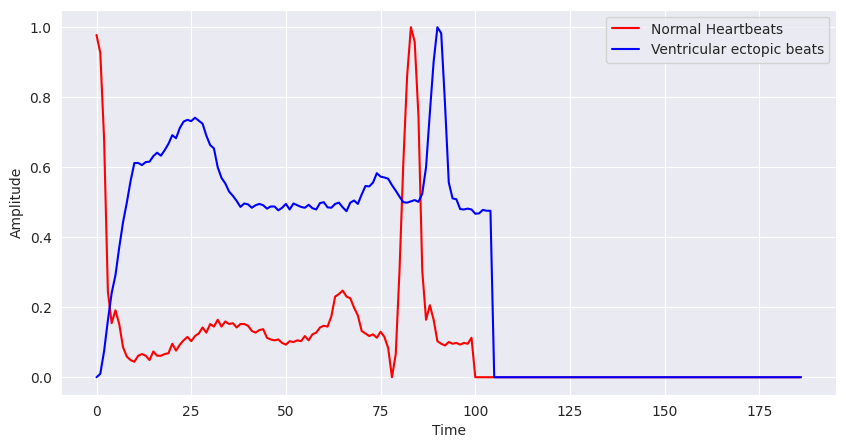

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='red', label='Normal Heartbeats')
plt.plot(data_2.iloc[0, 0:187], color='blue', label='Ventricular ectopic beats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

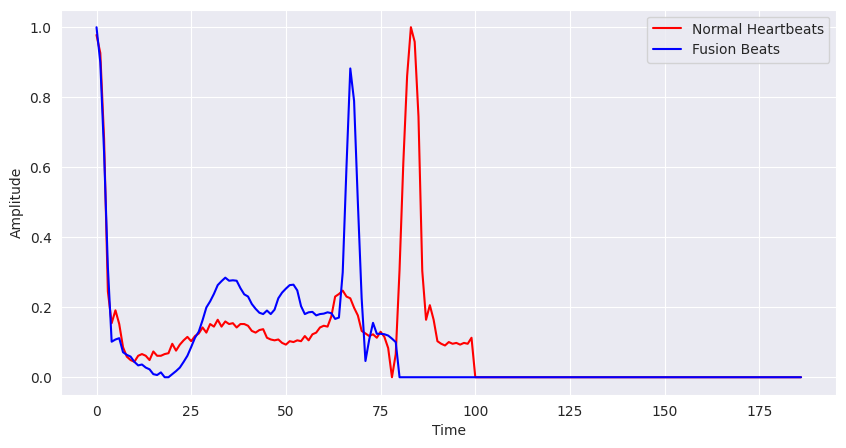

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='red', label='Normal Heartbeats')
plt.plot(data_3.iloc[0, 0:187], color='blue', label='Fusion Beats ')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

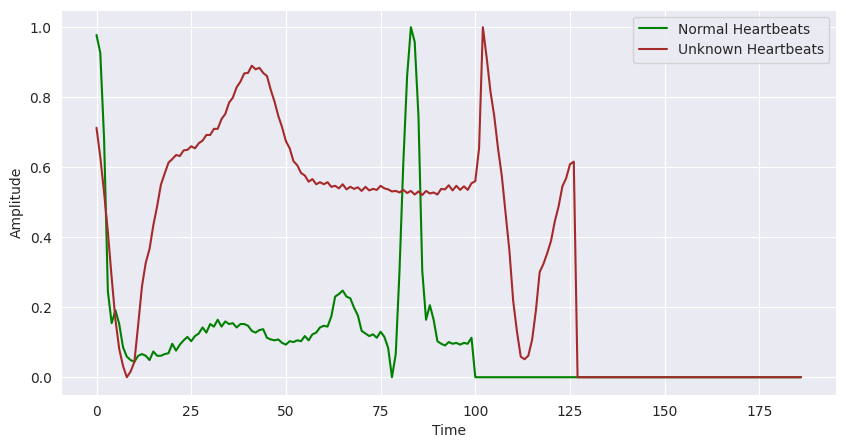

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='green', label='Normal Heartbeats')
plt.plot(data_4.iloc[0, 0:187], color='brown', label='Unknown Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

In [28]:
y_abnormal = np.ones(abnormal.shape[0])
y_abnormal = pd.DataFrame(y_abnormal)

y_normal = np.zeros(normal.shape[0])
y_normal = pd.DataFrame(y_normal)

# merging the original dataframe
X = pd.concat([abnormal, normal], sort=True)
y = pd.concat([y_abnormal, y_normal], sort=True)


In [29]:
X.shape

(14552, 187)

In [30]:
y.shape

(14552, 1)

In [31]:
normal.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
abnormal.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
182    0
183    0
184    0
185    0
186    0
Length: 187, dtype: int64

The output of above cell shows that there are no null values in our data, and the data can now be used for model fitting. We have two types of datasets, normal and abnormal, and they'll be used for model fitting.

In [33]:
train_dataset = pd.concat([data_0,data_1,data_2, data_3,data_4])

In [34]:
train_dataset

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


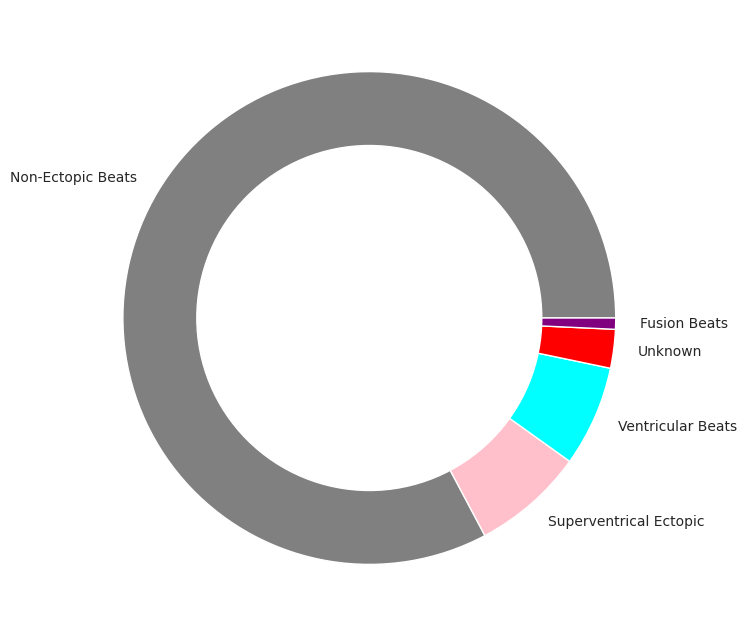

In [35]:
# viewing the distribution of beats in our dataset
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train_dataset[187].value_counts(), labels=['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats',
                                                'Unknown', 'Fusion Beats'], colors=['grey', 'pink', 'cyan',
                                                                                   'red', 'purple'])
p = plt.gcf()
p.gca().add_artist(circle)

#MAKING X & Y VARIABLES

In [36]:
target_train = train_dataset[187]
target_test = data_test[187]
target_train.unique()

array([0., 1., 2., 3., 4.])

In [37]:
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)
y_train[:4]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

#DATA SLICING

This stage involves the data split into train & test sets. The training data will be used for training our model, and the testing data will be used to check the performance of model on unseen dataset. We're using a split of 80-20, i.e., 80% data to be used for training & 20% to be used for testing purpose.



In [38]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = data_test.iloc[:, :-1].values

In [39]:
X_train.shape


(87554, 187)

In [40]:
X_test.shape

(21892, 187)

In [41]:
y_train.shape

(87554, 5)

In [42]:
y_test.shape

(21892, 5)

#APPLYING MODEL

Random Forest Classification
Support Vector Machines (SVM)
Convolutional Neural Network (CNN)

## Convolutional Neural Network (CNN)

We will apply the CNN algorithm to our data to generate prediction results. First, we need to reshape our data for CNN. We will use 1-dimensional CNN for our model, reshaping our data as per the dimensins of our CNN>

In [43]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((87554, 187, 1), (21892, 187, 1))

In [44]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))


    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [45]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 64)           448       
                                                                 
 batch_normalization (BatchN  (None, 187, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 94, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 94, 64)           256       
 hNormalization)                                                 
                                                        

In [46]:
file_path = "baseline_1Dcnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_accuracy', mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor='val_accuracy', mode="max", patience=3, verbose=2)
logger = CSVLogger('logs.csv', append=True)
history = model.fit(X_train,y_train, epochs=50, verbose=2, callbacks=[logger,early,redonplat,checkpoint],validation_split=0.1,validation_data=(X_test,y_test))
model.load_weights(file_path)

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.97218, saving model to baseline_1Dcnn_mitbih.h5
2737/2737 - 38s - loss: 0.1208 - accuracy: 0.9664 - val_loss: 0.1046 - val_accuracy: 0.9722 - lr: 0.0010 - 38s/epoch - 14ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.97218 to 0.97680, saving model to baseline_1Dcnn_mitbih.h5
2737/2737 - 20s - loss: 0.0687 - accuracy: 0.9797 - val_loss: 0.0853 - val_accuracy: 0.9768 - lr: 0.0010 - 20s/epoch - 7ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.97680 to 0.98214, saving model to baseline_1Dcnn_mitbih.h5
2737/2737 - 20s - loss: 0.0546 - accuracy: 0.9836 - val_loss: 0.0669 - val_accuracy: 0.9821 - lr: 0.0010 - 20s/epoch - 7ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.98214
2737/2737 - 24s - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0689 - val_accuracy: 0.9806 - lr: 0.0010 - 24s/epoch - 9ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.98214
2737/2737 - 29s - loss: 0.0378 - accu

In [47]:
model.evaluate(X_test, y_test)

685/685 [==============================] - 2s 3ms/step - loss: 0.0611 - accuracy: 0.9876


[0.061138592660427094, 0.987575352191925]

In [48]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

#Graphical Visualization of Predictions

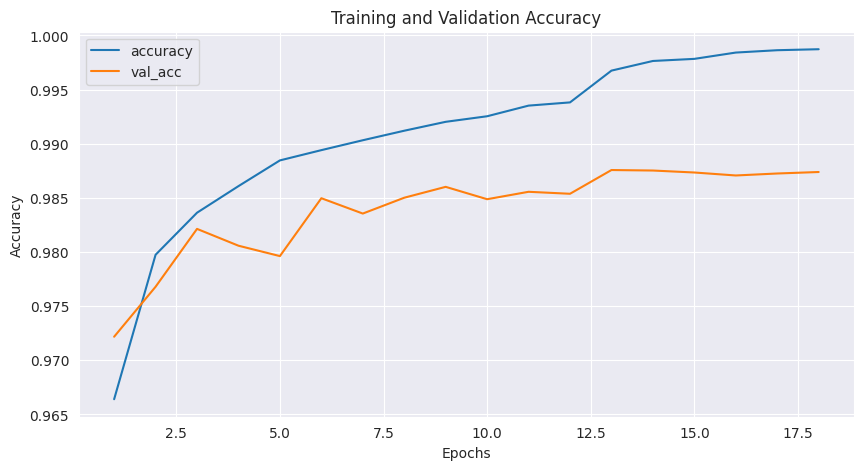

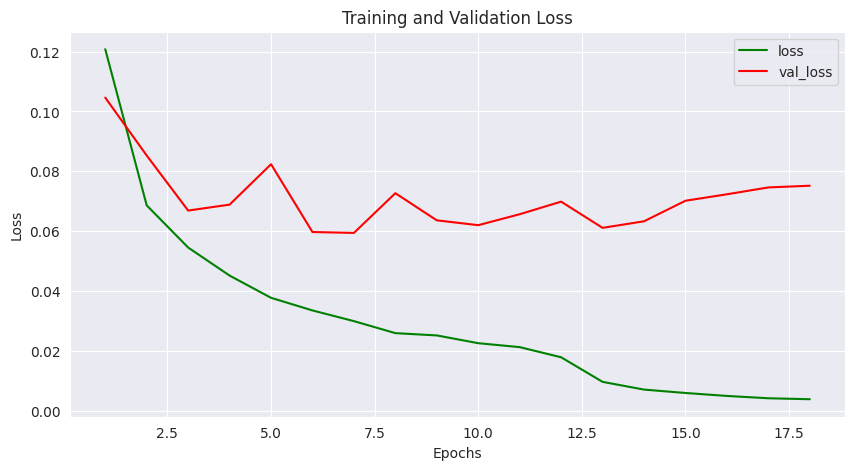

In [49]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc =history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [50]:
y_pred = model.predict(X_test)
y_hat = np.argmax(y_pred, axis = 1)
confusion_matrix(np.argmax(y_test, axis = 1), y_hat)

685/685 [==============================] - 2s 2ms/step


array([[18048,    36,    26,     6,     2],
       [   88,   457,    10,     0,     1],
       [   29,     6,  1390,    20,     3],
       [   18,     0,    11,   133,     0],
       [   13,     0,     3,     0,  1592]])

<Axes: >

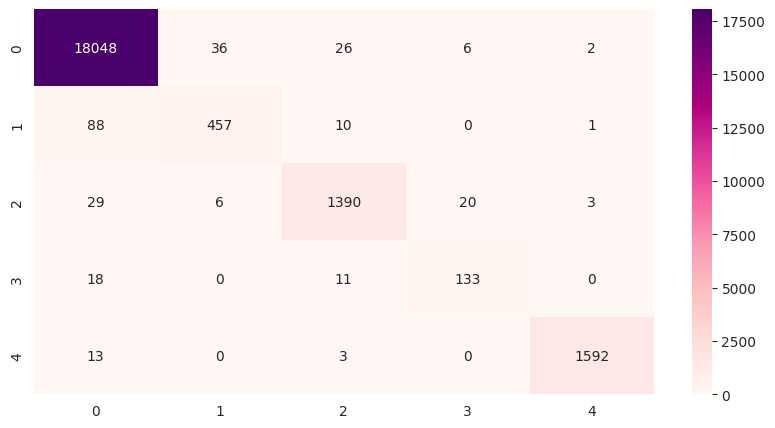

In [51]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), y_hat), annot=True, fmt='0.0f', cmap='RdPu')

In [52]:
# Convert one-hot encoded y_test to integer labels
y_test_integer = np.argmax(y_test, axis=1)

In [53]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(y_test_integer, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(y_test_integer, pred_test)

print("Test accuracy score : %s "% acc)

685/685 [==============================] - 2s 3ms/step
Test f1 score : 0.9289499394587798 
Test accuracy score : 0.9875753699981729 


In [54]:
print(classification_report(y_test_integer, pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.92      0.82      0.87       556
           2       0.97      0.96      0.96      1448
           3       0.84      0.82      0.83       162
           4       1.00      0.99      0.99      1608

    accuracy                           0.99     21892
   macro avg       0.94      0.92      0.93     21892
weighted avg       0.99      0.99      0.99     21892



## Optimized Model

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [71]:
X_train_subset, X_val, y_train_subset, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [72]:
import shutil
import os

if os.path.exists('/content/ECG_MODEL'):
    shutil.rmtree('/content/ECG_MODEL')

In [67]:
def build_CNN_model(hp):
    '''
    Perfrom the Hyperparameter tuning on number of Convolution Layers and Number of Fully Connected Layers
    -> In each Convolution Layer, hyperparameter tuning is done on number of filters, kernel size, pool size and dropouts
    -> In each Fully Connected Layers, hyperparameter tuning is done on number of units and dropouts
    '''
    # create model object
    model = tf.keras.Sequential()
    # 1st Convolution Layer
    kernel_size=hp.Choice('kernel_size_0', values=[2,3,4])
    model.add(Conv1D(filters = hp.Int('conv_0_filter', min_value=8, max_value=16, step=2),
                        kernel_size = (kernel_size),
                        activation='relu',
                        input_shape=(187, 1)))
    model.add(Dropout(hp.Float('dropout_0', min_value=0.05, max_value=0.1, step=0.01)))
    pool_size=hp.Choice('pool_size_0', values=[2,3])
    model.add(MaxPooling1D(pool_size=(pool_size),padding='same'))

    for i in range(hp.Int('number_of_convolution_layers', 0, 2)):
        # ith Convolution Layer
        kernel_size=hp.Choice(f'kernel_size_{i}', values=[2,3,4])
        model.add(Conv1D(filters = hp.Int(f'conv_{i}_filter', min_value=16, max_value=32, step=2),
                            kernel_size = (kernel_size),
                            activation='relu'))
        model.add(Conv1D(filters = hp.Int(f'conv_{i}_filter', min_value=32, max_value=64, step=2),
                            kernel_size = (kernel_size),
                            activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.05, max_value=0.1, step=0.01)))
        pool_size=hp.Choice(f'pool_size_{i}', values=[2,3])
        model.add(MaxPooling1D(pool_size=( pool_size),padding='same'))

    model.add(Flatten())

    model.add(Dropout(hp.Float('dropout_3', min_value=0.05, max_value=0.1, step=0.01)))
    for j in range(hp.Int('number_of_hidden_layers', 1, 3)):
        # jth Hidden Dense Layer
        hp_units = hp.Int(f'hidden_layer_{j}_units', min_value=8, max_value=256, step=4)
        model.add(Dense(units=hp_units, activation='relu'))
        # Add dropout for regularization
        hp_dropout = hp.Float(f'hidden_layer_{j}_dropout', min_value=0.05, max_value=0.2, step=0.01)
        model.add(Dropout(hp_dropout))

    model.add(Dense(5, activation='softmax'))
    '''
    Hyperparameter tuning on learning rate
    '''
    # Define the optimizer with the given learning rate
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=0.00001, max_value=0.001, step=0.00001))
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #model.summary()
    return model

In [76]:
# Define tuner to optimize the hyperparamaters using Random Search Optimization
from keras_tuner import RandomSearch
tuner = RandomSearch(build_CNN_model,
                      max_trials = 5,
                              objective='val_accuracy',
                              directory = 'ECG_MODEL', # directory that the tuned hyperparameter results are stored in (change the name of this directory if you get the message INFO:tensorflow:Oracle triggered exit)
                              project_name = 'ECG_PREDICTION',seed=100)

In [77]:
import IPython
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [78]:
# Define the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True,mode='max')
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
                                                         monitor = "val_loss",
                                                         factor = 0.1,
                                                         patience = 3,
                                                         verbose = 0,
                                                         mode = "min"
                                                         )

# Search for the best parameters
tuner.search(X_train_subset, y_train_subset,

             batch_size = 16,
             epochs=100,
             validation_data=(X_val, y_val),  # Use the validation data here
             callbacks = [ClearTrainingOutput(), early_stopping, reduce_lr_on_plateau])

Trial 5 Complete [00h 12m 25s]
val_accuracy: 0.9832115173339844

Best val_accuracy So Far: 0.9857240915298462
Total elapsed time: 00h 59m 27s
